# <center> **Canny Edge**

## **1. Importing data from Google Drive**

In [ ]:
# Montando o drive 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd drive/MyDrive/Processamento Digital de Imagem

/content/drive/MyDrive/Processamento Digital de Imagem


In [ ]:
%cd Canny Edge

/content/drive/MyDrive/Processamento Digital de Imagem/Canny Edge


## **2. Importing libraries**

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image # Import grayscale images
import random

## **3. Testing images**

In [ ]:
"""img = cv.imread('images/yuu.jpg', cv.IMREAD_GRAYSCALE)

cv.imshow('image',img)

cv.waitKey(0)
cv.destroyAllWindows()"""

"img = cv.imread('images/yuu.jpg', cv.IMREAD_GRAYSCALE)\n\ncv.imshow('image',img)\n\ncv.waitKey(0)\ncv.destroyAllWindows()"

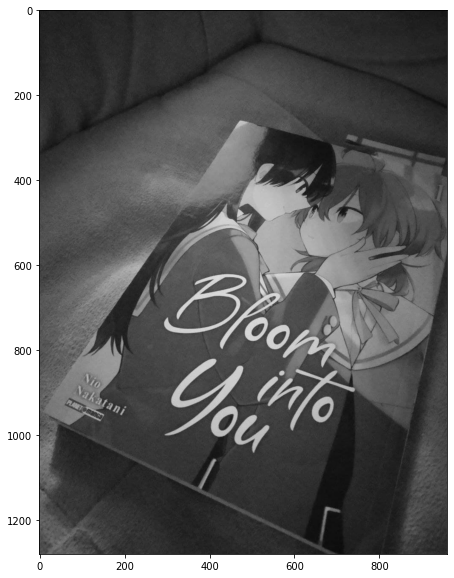

In [ ]:
# Ploting in grayscale with matplotlib #
fname = 'images/yuu.jpg'
image = Image.open(fname).convert("L")
arr = np.asarray(image)

plt.figure(figsize=(10,10))
plt.imshow(arr, cmap='gray', vmin=0, vmax=255)

plt.show()

## **4. Edge Detection**

Para aplicar o algoritmo de Canny, basta usar a função `cv.Canny()` do **OpenCV**.

In [ ]:
img = cv.imread('images/yuu.jpg', cv.IMREAD_GRAYSCALE)
edges = cv.Canny(img,100,200)

cv.imwrite('images/edge.jpg', edges)

True

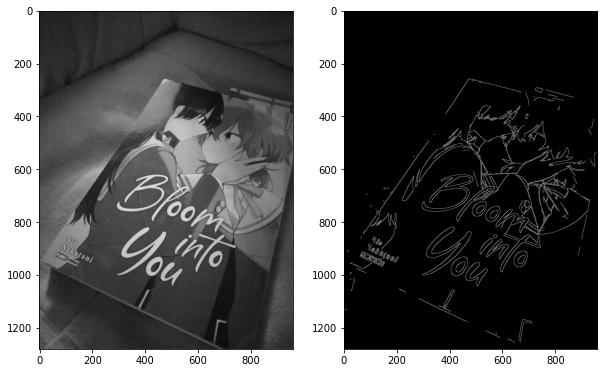

In [ ]:
# Ploting in grayscale with matplotlib #
fname = 'images/yuu.jpg'
image = Image.open(fname).convert("L")
arr = np.asarray(image)

fname = 'images/edge.jpg'
image = Image.open(fname).convert("L")
arr2 = np.asarray(image)

f, ax = plt.subplots(1, 2, figsize=(10, 10))
ax[0].imshow(arr, cmap='gray', vmin=0, vmax=255)
ax[1].imshow(arr2, cmap='gray', vmin=0, vmax=255)


plt.show()

## **5. Tecnica de Pontilhimos**

Para gerar um simples algoritmo de pontilhismo foi utilizado da ajuda da biblioteca `random` do Python, no qual será obtido valores inteiros alatorios. 

1. Para que um determinado pixel seja pintado sim ou não foi feito um `random.randint(0, 1)` no qual se for 0, ele irá pular o loop, caso seja 1, ele irá pintar um circulo naquele pixel.

2. Para alterar o tamanho do ciculo que será pintado na image, foi feito um outro `random.randint(1, 5)`, de forma que o circulo gerado terá circulos variados.

3. Note que no `for` loop a função `range(inicio, fim, passo)` possui um passo, e nesse passo há o tamanho do raio obtido randomicamente, para aumentar as chances de terem espaços vazios na imagem.

4. Para gerar circulos na imagem, foi feito uma varedura nas linhas e colunas da imagem.

In [ ]:
img = cv.imread('images/yuu.jpg', cv.IMREAD_GRAYSCALE)
img_copy = img.copy()
img_copy[:, :] = 255

height = img.shape[0]
width = img.shape[1]

radius = 5

# Varredura na imagem #
for i in range(0, height, radius):
    for j in range(0, width, radius):
        f = random.randint(0, 1)
        if f == 0:
            continue
        gray = int(img[i][j])
        color = (gray, gray, gray)
        # Circulo que será desenhado #
        cv.circle(img_copy, (j, i), radius, color, radius)
        radius = random.randint(1, 5) # Raio #

In [ ]:
cv.imwrite('images/pot1.jpg', img_copy)

True

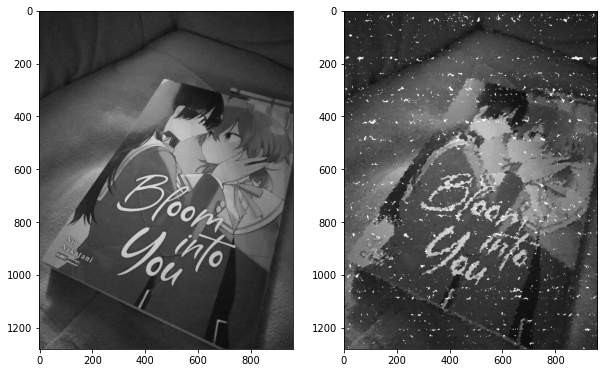

In [ ]:
# Ploting in grayscale with matplotlib #
fname = 'images/yuu.jpg'
image = Image.open(fname).convert("L")
arr = np.asarray(image)

fname = 'images/pot1.jpg'
image = Image.open(fname).convert("L")
arr2 = np.asarray(image)

f, ax = plt.subplots(1, 2, figsize=(10, 10))
ax[0].imshow(arr, cmap='gray', vmin=0, vmax=255)
ax[1].imshow(arr2, cmap='gray', vmin=0, vmax=255)


plt.show()

In [ ]:
# Função #
def pont_img(img):
    
    # Criando uma cópia da imagem e deixa ela branca #
    img_copy = img.copy()
    img_copy[:, :] = 255

    height = img.shape[0]
    width = img.shape[1]

    radius = 5

    # Varredura #
    for i in range(0, height, radius):
        for j in range(0, width, radius):
            f = random.randint(0, 1)
            if f == 0:
                continue
            gray = int(img[i][j])
            color = (gray, gray, gray)
            cv.circle(img_copy, (j, i), radius, color, radius)
            radius = random.randint(1, 5)
    
    return img_copy

## **6. Pontilhismo + Canny Edge**

In [ ]:
def cannyPot(img):
    
    edges = cv.Canny(img,100,200)
    img_p = pont_img(img)

    height = edges.shape[0]
    width = edges.shape[1]

    radius = 4

    # Desenho do circulo onde há pixel com valor igual a 255 #
    for i in range(height):
        for j in range(width):
            if(edges[i][j] == 255):
                gray = int(img[i][j])
                color = (gray, gray, gray)
                cv.circle(img_p, (j, i), radius, color, radius)
    
    return img_p

In [ ]:
img = cv.imread('images/yuu.jpg', cv.IMREAD_GRAYSCALE)

img_p = cannyPot(img)

cv.imwrite('images/edge+pot.jpg', img_p)

True

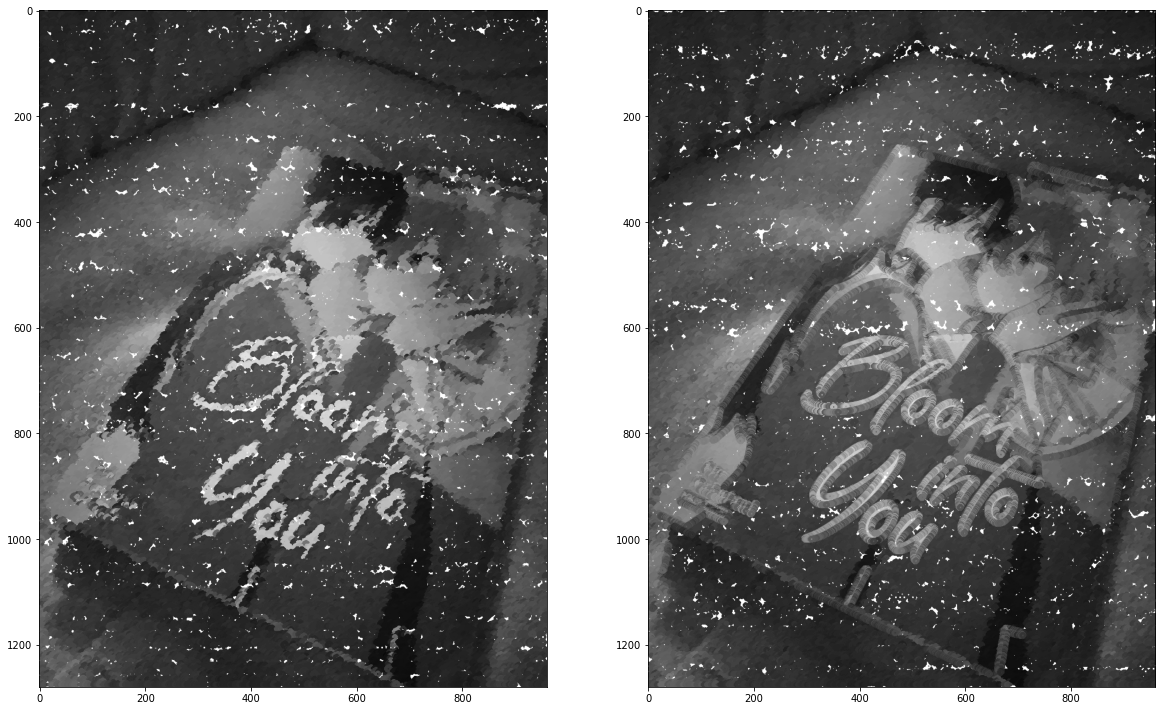

In [ ]:
# Ploting in grayscale with matplotlib #
fname = 'images/pot1.jpg'
image = Image.open(fname).convert("L")
arr = np.asarray(image)

fname = 'images/edge+pot.jpg'
image = Image.open(fname).convert("L")
arr2 = np.asarray(image)

f, ax = plt.subplots(1, 2, figsize=(20, 20))
ax[0].imshow(arr, cmap='gray', vmin=0, vmax=255)
ax[1].imshow(arr2, cmap='gray', vmin=0, vmax=255)


plt.show()